In [8]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def convoy(t,Z, N, b, c, T, v_f):
    A = np.array([[0, 1], [-c, -b]])
    B = np.array([[0, 0], [c, b - c * T]])
    M = np.zeros((2 * N, 2 * N))
    for i in range(N - 1):
        M[2 * i:2 * i + 2, 2 * i:2 * i + 2] = A
        M[2 * i:2 * i + 2, 2 * i + 2:2 * i + 4] = B
    M[2 * (N - 1):2 * N, 2 * (N - 1):2 * N] = A
    F = np.zeros(2 * N)
    F[2 * (N-1) + 1] = c * T * v_f
    return M.dot(Z) + F

def simulate_convoy(N, b, c, T, t_end=60):
    initial_spacing = 30
    initial_velocity = 20
    v_f = initial_velocity
    Z0 = np.zeros(2 * N)
    Z0[0::2] = initial_spacing * np.ones(N)
    Z0[1::2] = np.zeros(N)
    
    t = np.linspace(0, t_end, 300)
    solution = solve_ivp(convoy, [0, t_end], Z0, args=(N, b, c, T, v_f),t_eval=t, dense_output=True)
    Z = solution.y
    return t, Z


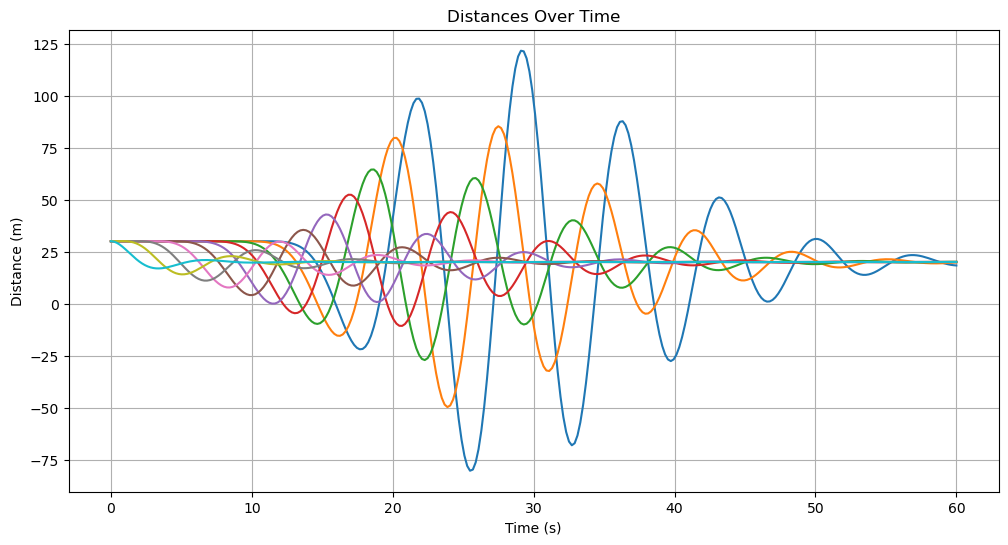

KeyboardInterrupt: 

In [9]:
# Parameters for simulation
N = 10
b = 7/10
c = 1
T = 1
t_end = 60

# Run the simulation
t, Z = simulate_convoy(N, b, c, T, t_end)
# Plotting the results for distances
plt.figure(figsize=(12, 6))
for i in range(N):

    plt.plot(t, Z[2*i], label=f'Distance Car {i+1} to Car {i+2}' if i < N-1 else f'Distance Car {i+1} to Lead')
plt.title('Distances Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Distance (m)')
#plt.legend()
plt.grid(True)
plt.show()

# Plotting the results for velocity differences
plt.figure(figsize=(12, 6))
for i in range(N):
    plt.plot(t, Z[2*i+1], label=f'Velocity Difference Car {i+1}')
plt.title('Velocity Differences Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Velocity Difference (m/s)')
#plt.legend()
plt.grid(True)
plt.show()

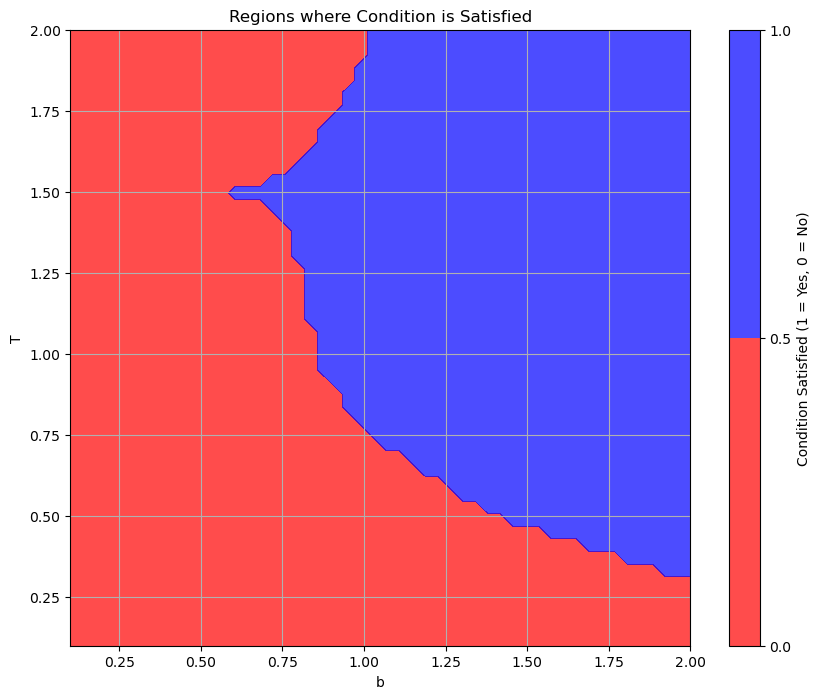

In [50]:
N = 10
c = 1
b_values = np.linspace(0.1, 2, 50)  # Range of b
T_values = np.linspace(0.1, 2, 50)  # Range of T
t_end = 100

# Initialize a matrix to store results
results = np.zeros((len(b_values), len(T_values)))

# Analyze for each combination of b and T
for i, b in enumerate(b_values):
    for j, T in enumerate(T_values):
        t, Z = simulate_convoy(N, b, c, T, t_end)
        # Check a condition, e.g., if all distances remain positive
        distances = Z[0::2]  # Extract distances from solution
        if np.all(distances > 0):  # Condition: All distances > 0
            results[i, j] = 1  # Mark as satisfying the condition

# Plot the results
B, T = np.meshgrid(b_values, T_values)
plt.figure(figsize=(10, 8))
plt.contourf(B, T, results.T, levels=[0, 0.5, 1], colors=['red', 'blue'], alpha=0.7)
plt.colorbar(label="Condition Satisfied (1 = Yes, 0 = No)")
plt.title("Regions where Condition is Satisfied")
plt.xlabel("b")
plt.ylabel("T")
plt.grid(True)
plt.show()


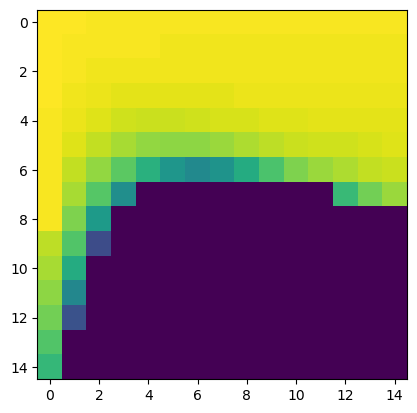

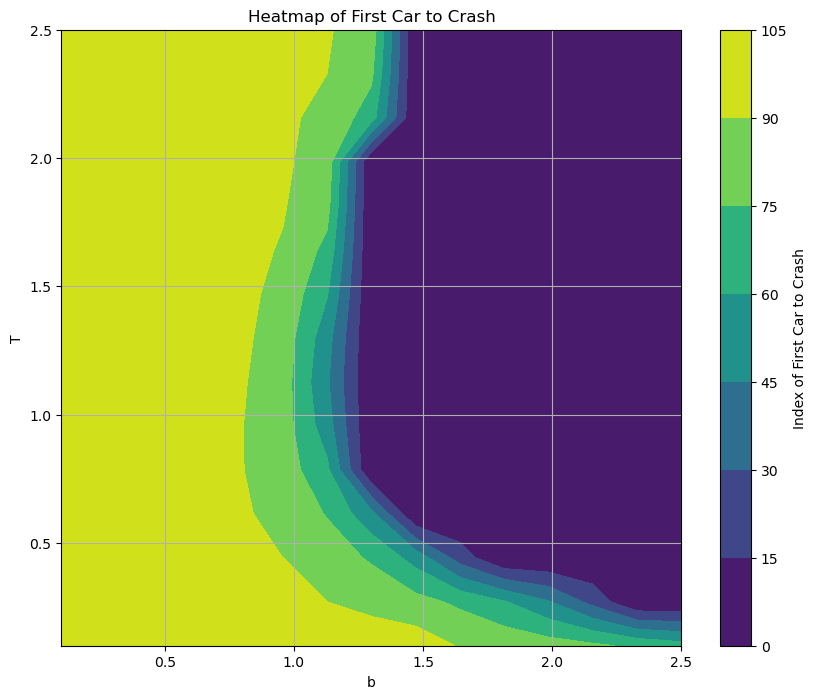

In [55]:
# Parameters for the analysis
N = 100  # Large N to capture behavior
c = 1
b_values = np.linspace(0.1, 2.5, 15)  # Range of b
T_values = np.linspace(0.1, 2.5, 15)  # Range of T
t_end = 100

# Initialize a matrix to store results
results = np.zeros((len(b_values), len(T_values)))

# Analyze for each combination of b and T
for i, b in enumerate(b_values):
    for j, T in enumerate(T_values):
        t, Z = simulate_convoy(N, b, c, T, t_end)
        distances = np.flip(Z[0::2,:],axis=0)  # Extract distances from solution
        # Find the first car to crash (distance <= 0)
        crashed = np.where(np.min(distances,axis=1)<=0)[0]
        if len(crashed) > 0:
            results[i, j] = N-(crashed[0]+1)  # Index of the first car to crash


# Plot the heatmap
B, T = np.meshgrid(b_values, T_values)
plt.figure(figsize=(10, 8))
plt.contourf(B, T, results.T, cmap='viridis')
plt.colorbar(label="Index of First Car to Crash")
plt.title("Heatmap of First Car to Crash")
plt.xlabel("b")
plt.ylabel("T")
plt.grid(True)
plt.show()



In [3]:
#define sim_con for break case
def simulate_convoy(N, b, c, T, t_end=60,Break=10):
    initial_spacing = T*20
    
    v_f = 20
    Z0 = np.zeros(2 * N)
    Z0[0::2] = initial_spacing * np.ones(N)
    Z0[1::2] = np.zeros(N)

    
    Z0[2*N-1]=Break
    Z0[2*N-3]=-Break
    
    t = np.linspace(0, t_end, 300)
    solution = solve_ivp(convoy, [0, t_end], Z0, args=(N, b, c, T, v_f),t_eval=t, dense_output=True)
    Z = solution.y
    return t, Z

In [10]:


# Parameters for the analysis
N = 100  # Large N to capture behavior
c = 1
b_values = np.linspace(0.1, 2.5, 10)  # Range of b
T_values = np.linspace(0.1, 5, 10)  # Range of T
t_end = 100

# Initialize a matrix to store results
results = np.ones((len(b_values), len(T_values)))*np.log10(N)

# Analyze for each combination of b and T
for i, b in enumerate(b_values):
    for j, T in enumerate(T_values):
        t, Z = simulate_convoy(N, b, c, T, t_end,Break=-10)
        distances = np.flip(Z[0::2,:],axis=0)  # Extract distances from solution
        # Find the first car to crash (distance <= 0)
        crashed = np.where(np.min(distances,axis=1)<=0)[0]
        if len(crashed) > 0:
            results[i, j] = np.log10(crashed[0]+1)  # Index of the first car to crash



# Plot the heatmap
B, T = np.meshgrid(b_values, T_values)
plt.figure(figsize=(10, 8))
plt.contourf(B, T, results.T, cmap='viridis')
plt.colorbar(label="Index of First Car to Crash")
plt.title("Contour map of First Car to Crash")
plt.xlabel("beta:\u03B2")
plt.ylabel("gamma:\u03B3")
plt.grid(True)
plt.show()

TypeError: simulate_convoy() got an unexpected keyword argument 'Break'

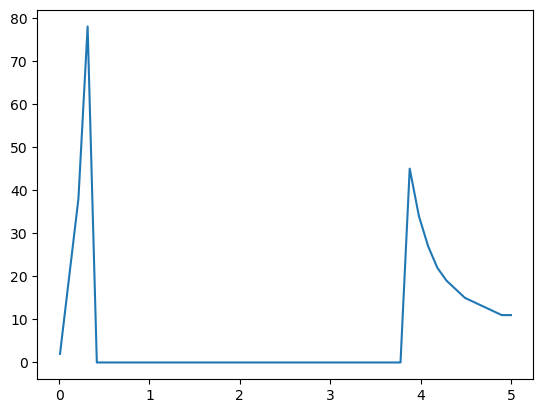

In [31]:
#plot creashes varying one perametor
# Parameters for the analysis
N = 500  # Large N to capture behavior
c = 1
b = 2
T = 1
values = np.linspace(0.01, 5, 50)  # Range of b

t_end = 100

# Initialize a matrix to store results
results = np.ones((len(values)))*0

# Analyze for each combination of b and T
for i, val in enumerate(values):
    T=val
    t, Z = simulate_convoy(N, b, c, T, t_end)
    distances = np.flip(Z[0::2,:],axis=0)  # Extract distances from solution
    # Find the first car to crash (distance <= 0)
    crashed = np.where(np.min(distances,axis=1)<=0)[0]
    if len(crashed) > 0:
        results[i] = (crashed[0]+1)  # Index of the first car to crash



plt.plot(values,results)
plt.show()

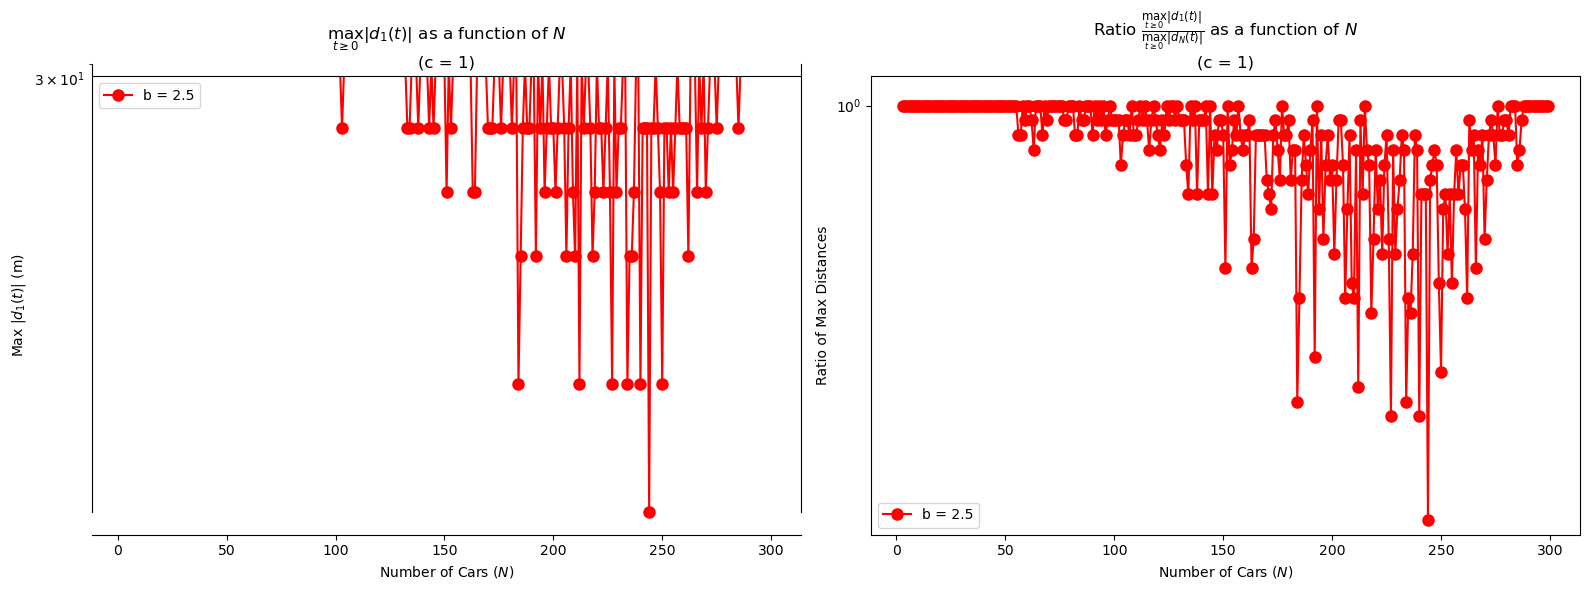

In [11]:
N_range = range(3, 300)  # Range of N values
b_values = [2.5]  # Different values of b to plot

# Create the plots
fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(16, 6))

#colors = ['red', 'green', 'blue', 'purple', 'orange', 'brown']
colors = ['red']
for b, color in zip(b_values, colors):
    max_d1_values = []
    max_dN_values = []
    for N in N_range:
        t, Z = simulate_convoy(N, b, 1, 2, 300)
        max_d1 = np.min((Z[0]))
        max_dN = np.min((Z[2 * (N - 1)]))
        max_d1_values.append(max_d1)
        max_dN_values.append(max_dN)

    ratio = np.array(max_d1_values) / np.array(max_dN_values)

    # Plot max |d1(t)| for each b
    ax2.plot(list(N_range), max_d1_values, marker='o', linestyle='-', color=color, markersize=8, label=f'b = {b}')
    ax2.set_yscale('log')  # Set logarithmic scale
    
    # Plot the ratio for each b
    ax1.plot(list(N_range), ratio, marker='o', linestyle='-', color=color, markersize=8, label=f'b = {b}')
    ax1.set_yscale('log')  # Set logarithmic scale

# Setting titles and labels for ax2
ax2.set_title(r'$\max_{t \geq 0} |d_1(t)|$ as a function of $N$' + f'\n(c = {c})')
ax2.set_xlabel('Number of Cars ($N$)')
ax2.set_ylabel('Max $|d_1(t)|$ (m)')
ax2.legend()

# Setting titles and labels for ax1
ax1.set_title(r'Ratio $\frac{\max_{t \geq 0} |d_1(t)|}{\max_{t \geq 0} |d_N(t)|}$ as a function of $N$' + f'\n(c = {c})')
ax1.set_xlabel('Number of Cars ($N$)')
ax1.set_ylabel('Ratio of Max Distances')
ax1.legend()

plt.tight_layout()
plt.show()
